<a href="https://colab.research.google.com/github/obotnamnso/Account-Project/blob/main/Telecom_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload the Dataset
from google.colab import files
uploaded = files.upload()

Saving telecom_users.xlsx to telecom_users.xlsx


In [ ]:
# !pip install pandas openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Excel Dataset into DataFrame
df = pd.read_excel('telecom_users.xlsx', engine='openpyxl')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Provider,Age
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,NaN,NaN
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No,NaN,NaN
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,NaN,NaN
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No,NaN,NaN
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,No,No,Month-to-month,No,Electronic check,53.45,119.5,No,NaN,NaN


## Check for Missing Data

In [ ]:
# Check column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6050 entries, 0 to 6049
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        6050 non-null   int64  
 1   customerID        6050 non-null   object 
 2   gender            6050 non-null   object 
 3   SeniorCitizen     6050 non-null   int64  
 4   Partner           6050 non-null   object 
 5   Dependents        6050 non-null   object 
 6   tenure            6050 non-null   int64  
 7   PhoneService      6050 non-null   object 
 8   MultipleLines     6050 non-null   object 
 9   InternetService   6050 non-null   object 
 10  OnlineSecurity    6050 non-null   object 
 11  OnlineBackup      6050 non-null   object 
 12  DeviceProtection  6050 non-null   object 
 13  TechSupport       6050 non-null   object 
 14  StreamingTV       6050 non-null   object 
 15  StreamingMovies   6050 non-null   object 
 16  Contract          6050 non-null   object 


In [ ]:
# Count missing values per column
df.isnull().sum()

,0
Unnamed: 0,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
# Remove unnecessary column!
df.drop(columns=['Unnamed: 0','Provider', 'Age'], axis=1, inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
# Check for Duplicates
df.duplicated().sum()

np.int64(64)

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 0 to 6049
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 
 17  

In [ ]:
# Shape of the Dataset
df.shape

(5986, 21)

## Perform Exploratory Data Analysis (EDA)
  1. Total Male Subscribers (which are not Senior Citizens) with the following:
    - a. Phone Service
    - b. Internet Service
    - c. Device Protection
    - d. Streaming TV
    - e. Paperless billing

In [ ]:
# Male Subscribers (Not Senior Citizens)
male_subscribers = df[
    (df['gender'] == 'Male') &
    (df['SeniorCitizen'] == 0) &
    (df['PhoneService'] == 'Yes') &
    (df['InternetService'] != 'No') &
    (df['DeviceProtection'] == 'Yes') &
    (df['StreamingTV'] == 'Yes') &
    (df['PaperlessBilling'] == 'Yes')
]
total_male_subscribers = len(male_subscribers)
print(f"Total Male Subscribers (Not Senior Citizens) with selected services: {total_male_subscribers}")

Total Male Subscribers (Not Senior Citizens) with selected services: 314


In [ ]:
male_subscribers.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
10,4578-PHJYZ,Male,0,Yes,Yes,52,Yes,No,DSL,No,...,Yes,Yes,Yes,No,One year,Yes,Electronic check,68.75,3482.85,No
15,1784-EZDKJ,Male,0,Yes,No,51,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),106.80,5498.8,No
21,4683-WYDOU,Male,0,Yes,No,62,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.60,6912.7,No
41,5193-QLVZB,Male,0,No,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.75,6536.5,No
81,9135-MGVPY,Male,0,Yes,No,69,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,84.70,5878.9,No
92,8999-YPYBV,Male,0,Yes,Yes,45,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,84.35,3858.05,No
127,0530-IJVDB,Male,0,No,Yes,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,114.60,7882.5,No
166,4751-ERMAN,Male,0,Yes,Yes,72,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),75.40,5480.25,No
193,6122-LJADA,Male,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.15,6237.05,No
217,3795-CAWEX,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.55,8152.3,No


2. Total Female Subscribers (which are not Senior Citizens) with the following:
    - a. Phone Service
    - b. Internet Service
    - c. Device Protection
    - d. Streaming TV
    - e. Paperless billing

In [ ]:
# Female Subscribers (Not Senior Citizens)
female_subscribers = df[
    (df['gender'] == 'Female') &
    (df['SeniorCitizen'] == 0) &
    (df['PhoneService'] == 'Yes') &
    (df['InternetService'] != 'No') &
    (df['DeviceProtection'] == 'Yes') &
    (df['StreamingTV'] == 'Yes') &
    (df['PaperlessBilling'] == 'Yes')
]
total_female_subscribers = len(female_subscribers)
print(f"Total Female Subscribers (Not Senior Citizens) with selected services: {total_female_subscribers}")

Total Female Subscribers (Not Senior Citizens) with selected services: 331


In [ ]:
female_subscribers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
14,2731-GJRDG,Female,0,No,No,32,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),109.55,3608,No
43,4657-FWVFY,Female,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),96.35,3915.4,No
70,8071-SBTRN,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Mailed check,111.15,7737.55,No
97,2167-FQSTQ,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,92.40,6786.1,No


# **Additional Summeries**
3. Total Male Subscribers (which are Senior Citizens) with the following:
    - a. Phone Service
    - b. Internet Service
    - c. Device Protection
    - d. Streaming TV
    - e. Paperless billing

In [ ]:
# Male Subscribers (Senior Citizens)
senior_male_subscribers = df[
    (df['gender'] == 'Male') &
    (df['SeniorCitizen'] == 1) &
    (df['PhoneService'] == 'Yes') &
    (df['InternetService'] != 'No') &
    (df['DeviceProtection'] == 'Yes') &
    (df['StreamingTV'] == 'Yes') &
    (df['PaperlessBilling'] == 'Yes')]

total_senior_male_subscribers = len(senior_male_subscribers)
print(f"Total Male Subscribers (Senior Citizens) with selected services: {total_senior_male_subscribers}")

Total Male Subscribers (Senior Citizens) with selected services: 106


4. Total Female Subscribers (which are Senior Citizens) with the following:
    - a. Phone Service
    - b. Internet Service
    - c. Device Protection
    - d. Streaming TV
    - e. Paperless billing

In [ ]:
# Female Subscribers (Senior Citizens)
senior_female_subscribers = df[
    (df['gender'] == 'Female') &
    (df['SeniorCitizen'] == 1) &
    (df['PhoneService'] == 'Yes') &
    (df['InternetService'] != 'No') &
    (df['DeviceProtection'] == 'Yes') &
    (df['StreamingTV'] == 'Yes') &
    (df['PaperlessBilling'] == 'Yes')]

total_senior_female_subscribers = len(senior_female_subscribers)
print(f"Total Female Subscribers (Senior Citizens) with selected services: {total_senior_female_subscribers}")

Total Female Subscribers (Senior Citizens) with selected services: 105


In [ ]:
# Total Senior and Non Senior Subscribers
total_non_senior_subscribers = (df['SeniorCitizen'] == 0).sum()
total_senior_subscribers = (df['SeniorCitizen'] == 1).sum()

print("Total Non-Senior Subscribers:", total_non_senior_subscribers)
print("Total Senior Subscribers:", total_senior_subscribers)

Total Non-Senior Subscribers: 5020
Total Senior Subscribers: 966


In [ ]:
# Senior Subscribers by Gender
total_senior_male_subscribers = ((df['gender'] == 'Male') & (df['SeniorCitizen'] == 1)).sum()
print("Total Senior Male Subscribers:", total_senior_male_subscribers)

total_senior_female_subscribers = ((df['gender'] == 'Female') & (df['SeniorCitizen'] == 1)).sum()
print("Total Senior Female Subscribers:", total_senior_female_subscribers)

Total Senior Male Subscribers: 484
Total Senior Female Subscribers: 482


In [ ]:
# Non Senior Subscribers by Gender
total_male_subscribers = ((df['gender'] == 'Male') & (df['SeniorCitizen'] == 0)).sum()
print("Total Male Subscribers:", total_male_subscribers)

total_female_subscribers = ((df['gender'] == 'Female') & (df['SeniorCitizen'] == 0)).sum()
print("Total Female Subscribers:", total_female_subscribers)

Total Male Subscribers: 2566
Total Female Subscribers: 2454


In [ ]:
# Average Monthly Charged by Gender
avg_monthly_charges = df.groupby("gender")["MonthlyCharges"].mean()
print("Average Monthly Charges by Gender:\n", round(avg_monthly_charges,2))

Average Monthly Charges by Gender:
 gender
Female    65.24
Male      64.38
Name: MonthlyCharges, dtype: float64


In [ ]:
# Customers with Online Security Subscriptions
online_security = df.groupby('OnlineSecurity').size()
print('Customers with Online Security Subscriptions: \n',online_security)

Customers with Online Security Subscriptions: 
 OnlineSecurity
No                     2982
No internet service    1291
Yes                    1713
dtype: int64


In [ ]:
# Customers with Online Security Subscriptions by Gender
gender_online_security = df.groupby(['gender', 'OnlineSecurity']).size()
print('Customers with Online Security Subscriptions by Gender: \n',gender_online_security)

Customers with Online Security Subscriptions by Gender: 
 gender  OnlineSecurity     
Female  No                     1439
        No internet service     627
        Yes                     870
Male    No                     1543
        No internet service     664
        Yes                     843
dtype: int64


In [ ]:
# Customers with Multiple Lines
multiple_lines = df.groupby('MultipleLines').size()
print('Customers with Multiple Lines:\n ',multiple_lines)

Customers with Multiple Lines:
  MultipleLines
No                  2848
No phone service     590
Yes                 2548
dtype: int64


In [ ]:
# Customers with Multiple Lines by Gender
multiple_lines_by_gender = df.groupby(['gender', 'MultipleLines']).size()
print('Customers with Multiple Lines by Gender:\n ',multiple_lines_by_gender)

Customers with Multiple Lines by Gender:
  gender  MultipleLines   
Female  No                  1400
        No phone service     285
        Yes                 1251
Male    No                  1448
        No phone service     305
        Yes                 1297
dtype: int64


In [ ]:
# Churn Rate by Gender
churn_rate = df.groupby("gender")["Churn"].value_counts(normalize=True) * 100
print("Churn Rate by Gender:\n", churn_rate)

Churn Rate by Gender:
 gender  Churn
Female  No       73.058583
        Yes      26.941417
Male    No       73.901639
        Yes      26.098361
Name: proportion, dtype: float64


In [ ]:
# Contract Types Distribution
contract_distribution = df.groupby('Contract').size()
print("Contract Types Distribution:\n", contract_distribution)

Contract Types Distribution:
 Contract
Month-to-month    3269
One year          1276
Two year          1441
dtype: int64


# Visualisations

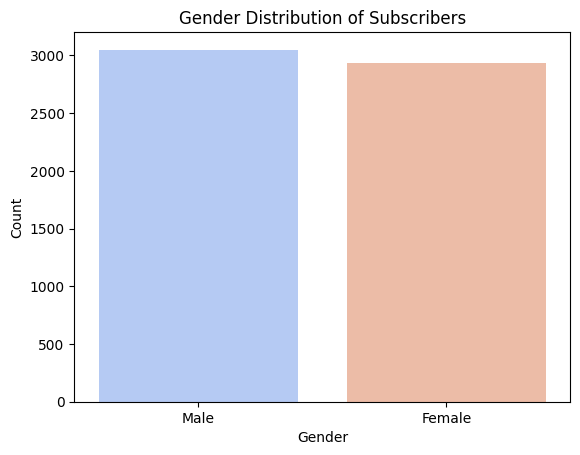

In [ ]:
# Gender Distribution
# sns.countplot(x=df['gender'], palette='coolwarm')
sns.countplot(x='gender', hue='gender', data=df, palette='coolwarm', legend=False)
plt.title('Gender Distribution of Subscribers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

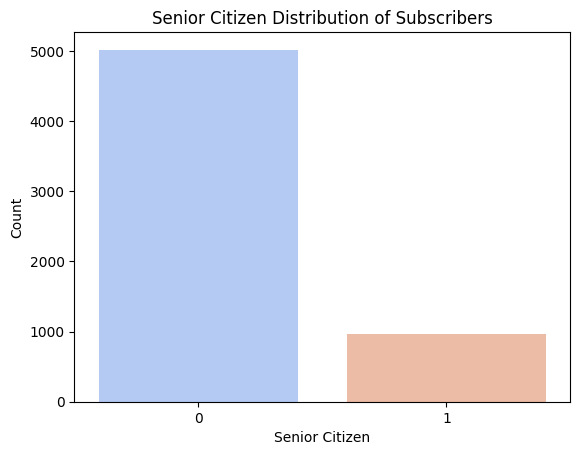

In [ ]:
# Senior/Non_Senior Citizen Distribution
#sns.countplot(x=df['SeniorCitizen'], palette='coolwarm')
sns.countplot(x='SeniorCitizen', hue='SeniorCitizen', data=df, palette='coolwarm', legend=False)
plt.title('Senior Citizen Distribution of Subscribers')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.show()

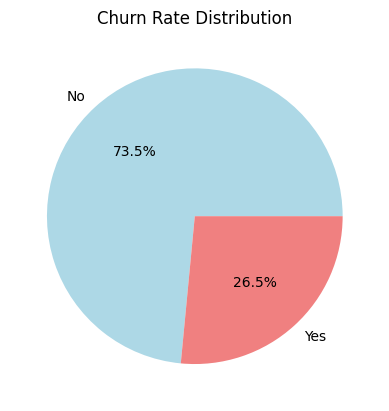

In [ ]:
# Churn Rate
df["Churn"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "lightcoral"])
plt.title("Churn Rate Distribution")
plt.ylabel("")
plt.show()

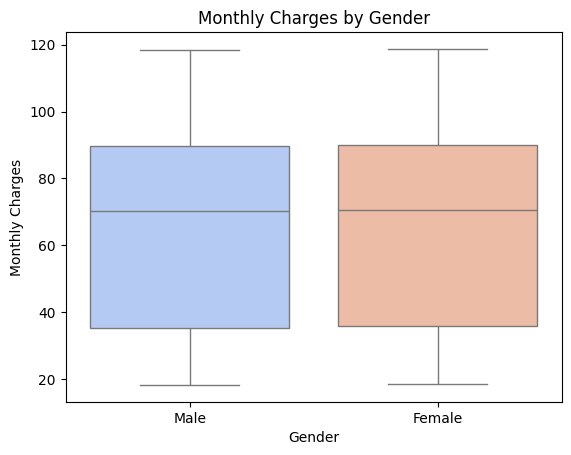

In [ ]:
# Monthly Charges by Gender
# sns.boxplot(x=df['gender'], y=df['MonthlyCharges'], palette='coolwarm')
sns.boxplot(x='gender', y='MonthlyCharges', hue='gender', data=df, palette='coolwarm', legend=False)
plt.title('Monthly Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly Charges')
plt.show()

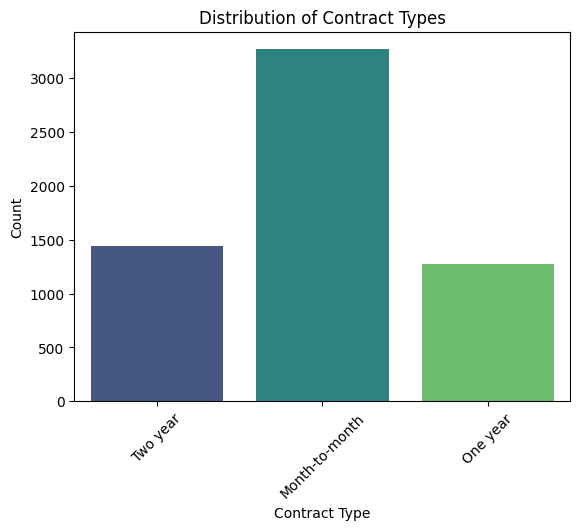

In [ ]:
# Contract Type Distribution
sns.countplot(x="Contract", hue ="Contract", data=df, palette="viridis")
plt.title("Distribution of Contract Types")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Average Monthly Charges of filtered group
print("Average Monthly Charges:", male_subscribers["MonthlyCharges"].mean())

# Churn Rate in filtered group
print("Churn Rate:", male_subscribers["Churn"].value_counts(normalize=True) * 100)

# Distribution of contract types among filtered subscribers
print(male_subscribers["Contract"].value_counts())

Average Monthly Charges: 96.73375796178344
Churn Rate: Churn
No     72.929936
Yes    27.070064
Name: proportion, dtype: float64
Contract
Two year          128
Month-to-month    105
One year           81
Name: count, dtype: int64


In [ ]:
print(df["Contract"].value_counts())

Contract
Month-to-month    3269
Two year          1441
One year          1276
Name: count, dtype: int64


In [ ]:
df_2 = male_subscribers[["gender",'SeniorCitizen',"PhoneService","InternetService","DeviceProtection","StreamingTV"]]
df_2.head()

,gender,SeniorCitizen,PhoneService,InternetService,DeviceProtection,StreamingTV
10,Male,0,Yes,DSL,Yes,Yes
15,Male,0,Yes,Fiber optic,Yes,Yes
21,Male,0,Yes,Fiber optic,Yes,Yes
41,Male,0,Yes,Fiber optic,Yes,Yes
81,Male,0,Yes,DSL,Yes,Yes


In [ ]:
!jupyter nbconvert --execute --to html "/content/Telecom_Task.ipynb"